# Fondamenti di elaborazione immagini

## Effettuiamo l'import delle librerie utilizzate nell'esercitazione.

In [1]:
import cv2
import numpy as np
import matplotlib as mapli
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

Di seguito i riferimenti alle pagine di documentazione, sempre utiliti:

* Rif: [numpy](https://numpy.org/doc/stable/)
* Rif: [opencv](https://docs.opencv.org/)
* Rif: [matplotlib](https://matplotlib.org/stable/index.html)

Aggiungiamo alcune funzioni di utilita' per semplificare la scrittura del codice.

In [2]:
def rgb(image : np.array) -> np.array:
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def gray(image : np.array) -> np.array:
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def grid(images : list[np.array], rows : int, cols : int, size : int, colors : list[str] = None) -> None:
    fig = plt.figure(figsize=(size,size))
    grid = ImageGrid(fig, 111, nrows_ncols=(rows, cols), axes_pad=0.1)

    if colors is not None:
        counter = 0
        for ax, im in zip(grid, images):
            ax.imshow(im, cmap=colors[counter])
            counter = (counter + 1) % len(colors)
        plt.show()
    else:
        for ax, im in zip(grid, images):
            ax.imshow(im)
        plt.show()

## _Sappiamo che le immagini sono matrici di numeri e, in quanto tali, operazioni aritmentiche elemento per elemento sono permesse e significative._

Le operazioni applicabili sono molte e combinabili fra loro percio', di seguito, mostreremo solo alcuni esempi.

Immaginiamo ad esempio di voler creare una serie di immagini sintetiche che poi saranno utilizzate per addestrare un sistema di localizzazione automatica: _un localizzatore di mele nel cielo_. Il cielo ha mille sfumature, altrettante ne hanno le mele. Combinando cieli e mele potremmo ottenere un buon dataset.

Carichiamo una immagine di sfondo, il cielo e un'immagine in primo piano, la mela. Quest'ultima non e' semplicemente una immagine a 3 canali ma a 4 dove il quarto canale rappresenta il livello di trasparenza. Per caricare l'immagine nella sua interezza, senza escludere il canale della trasparenza, utilizziamo il flag _cv2.IMREAD_UNCHANGED_ della funzione _imread_.

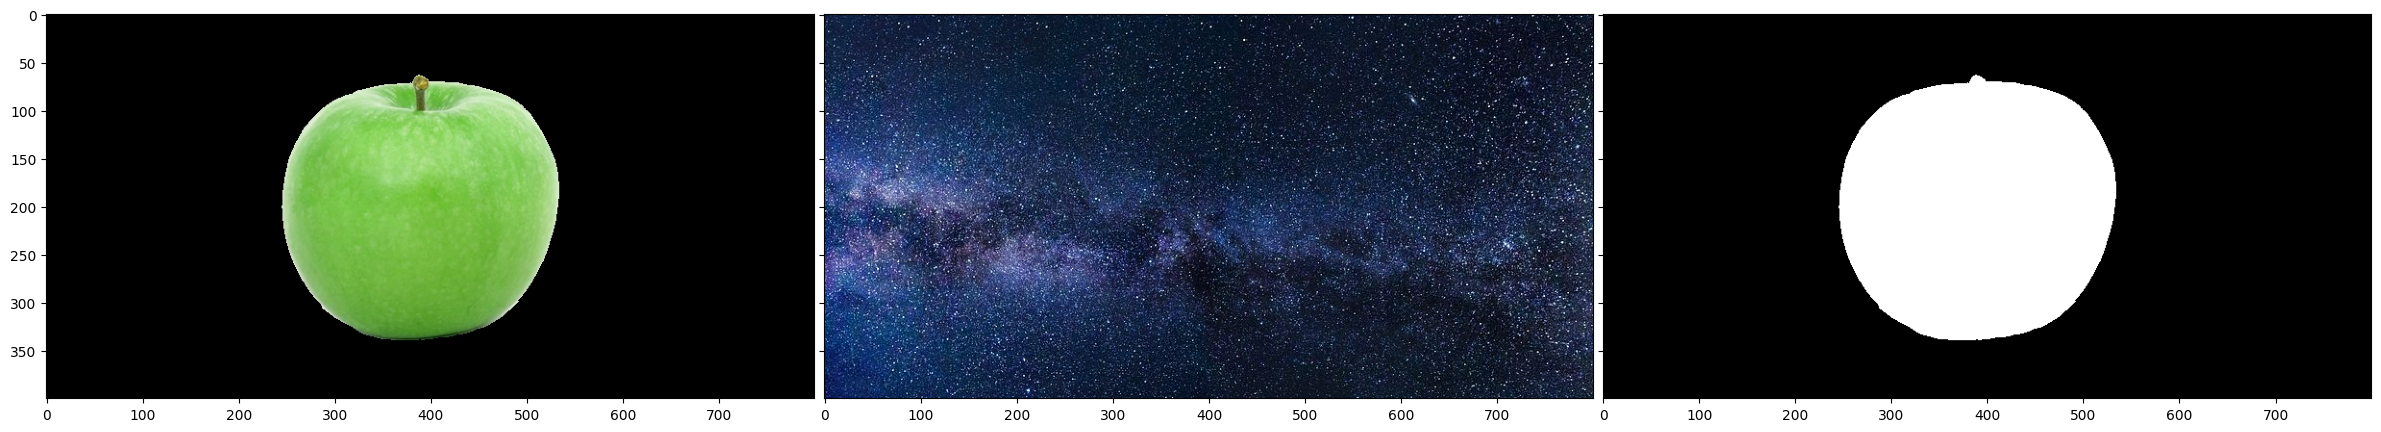

In [3]:
apple = cv2.imread('./imgs/apples/apple_1.png', cv2.IMREAD_UNCHANGED)   # carichiamo l'immagine rgba, 3 canali + trasparenza
sky = cv2.imread('./imgs/skies/sky_1.png')                              # carichiamo l'immagine del cielo
_, apple_mask = cv2.threshold(apple[:,:,3], 0, 255, cv2.THRESH_BINARY)  # eseguiamo una SOGLIATURA sulla trasparenza per ottenere una maschera della mela.

grid([rgb(apple), rgb(sky), rgb(apple_mask)], 1, 3, 30)

Per fare una sovrapposizione che tenga conto della trasparenza, e' necessario conoscere dove l'oggetto in primo piano, la mela, si trova e dove no. Una maschera binaria rappresentera' queste informazioni in due colori dai valori, rispettivamente, di 0 e 1. Per ottenere questo, dividiamo l'immagine per 255 e ne riportiamo il formato ad 8 bit senza segno (0-255).

In [4]:
apple_mask = (apple_mask / 255).astype(np.uint8)

In [5]:
apple_mask = rgb(apple_mask)    # convertiamo nel piano RGB per la visualizzazione e per portare le immagini a 3 dimensioni.
apple_no_sky = rgb(apple)       # convertiamo nel piano RGB per la visualizzazione e per portare le immagini a 3 dimensioni.
sky_no_apple = rgb(sky)         # convertiamo nel piano RGB per la visualizzazione e per portare le immagini a 3 dimensioni.

A questo punto le immagini hanno la stessa dimensione e lo stesso formato. E' possibile applicare una moltiplicazione pixel a pixel per escludere la mela dal cielo e il cielo dalla mela. Per farlo utiliziamo una il metodo _multiply_ di _opencv_.

* Rif: [multiply](https://docs.opencv.org/4.7.0/d2/de8/group__core__array.html#ga979d898a58d7f61c53003e162e7ad89f)

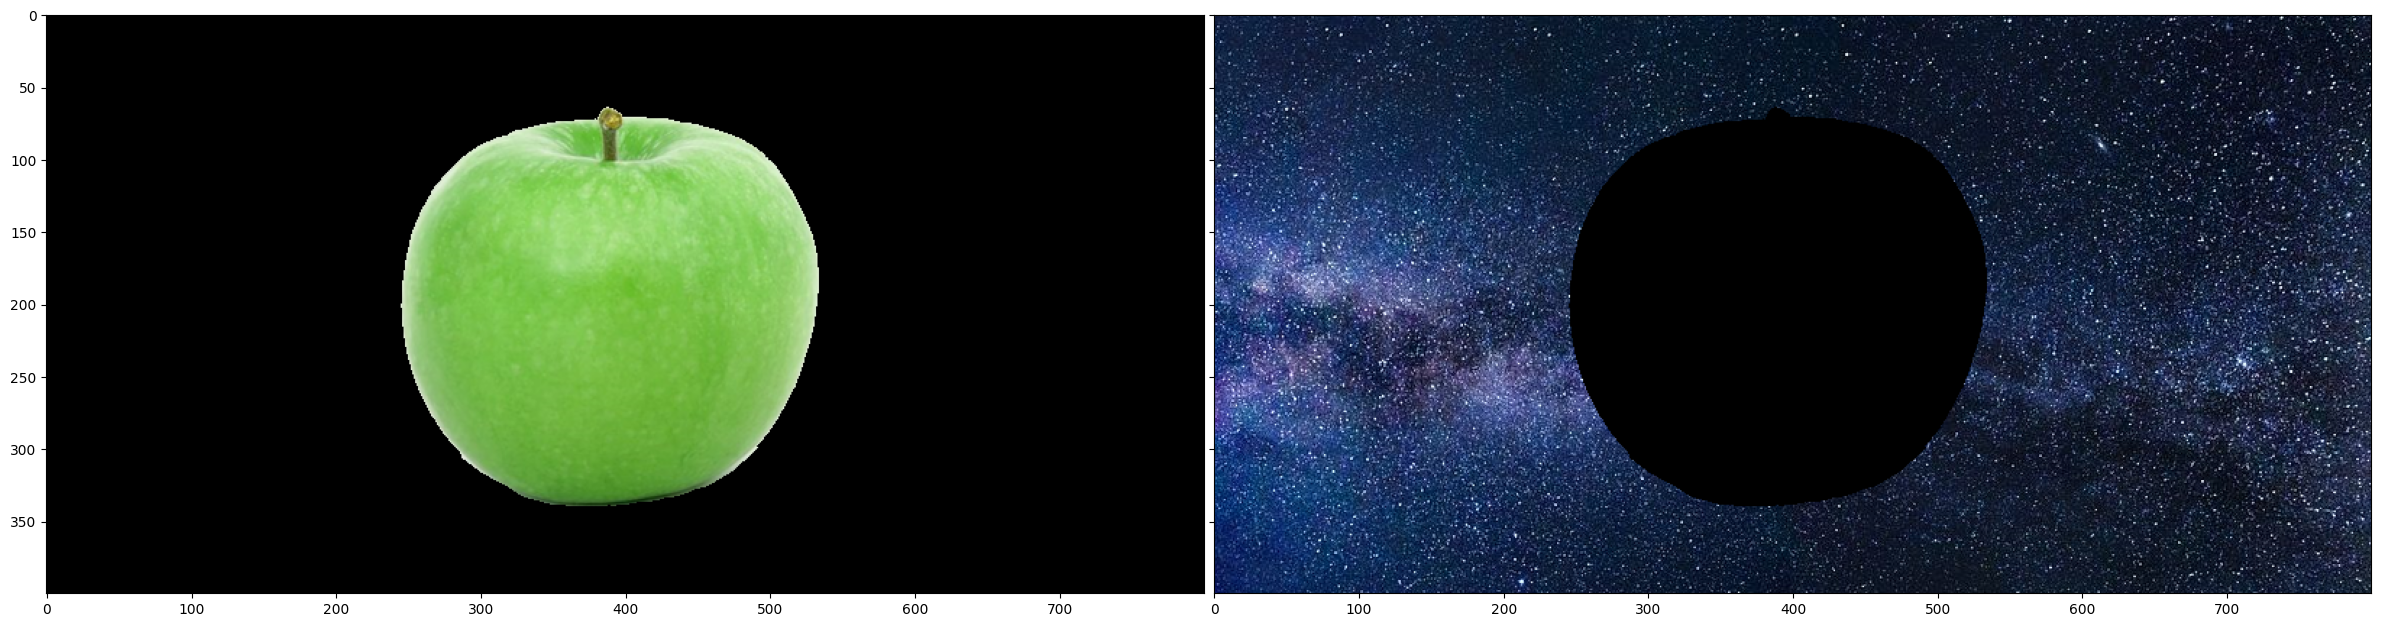

In [6]:
apple_no_sky = cv2.multiply(apple_mask, apple_no_sky)
sky_no_apple = cv2.multiply(1 - apple_mask, sky_no_apple)

grid([apple_no_sky, sky_no_apple], 1, 2, 30)

Sovrapponiamo le immagini con una semplice somma. In questo caso, abbiamo la garanzia di non sforare il range 0-255. Usiamo il metodo _add_ di _opencv_.

* Rif: [add](https://docs.opencv.org/4.7.0/d2/de8/group__core__array.html#ga10ac1bfb180e2cfda1701d06c24fdbd6) 

In [7]:
apple_in_the_sky = cv2.add(apple_no_sky, sky_no_apple)

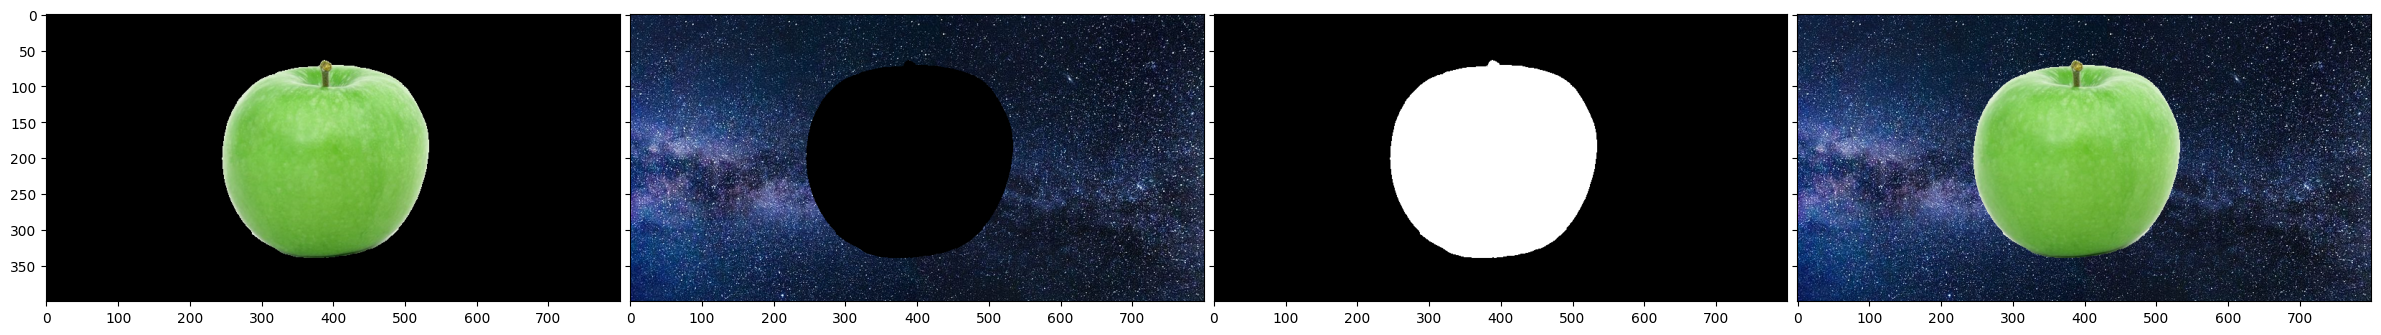

In [8]:
grid([apple_no_sky, sky_no_apple, apple_mask*255, apple_in_the_sky], 1, 4, 30)

Se avessimo sovrapposto le immagini con una semplice somma pesata, senza tenere conto della traspareza, avremmo ottenuto un risultato accettabile ma non realistico. Il metodo in questione e' _addWeighted_ di _opencv_ dove va indicato, per ogni sorgente, quanto percentualmente quest'ultima influira'.

* Rif: [addWeighted](https://docs.opencv.org/4.7.0/d2/de8/group__core__array.html#gafafb2513349db3bcff51f54ee5592a19)

In [ ]:
apple = cv2.imread('./imgs/apples/apple_1.png')
sky = cv2.imread('./imgs/skies/sky_1.png')

weighted_sky_with_apple = cv2.addWeighted(apple, 0.5, sky, 0.5, -1)
grid([rgb(apple), rgb(sky), rgb(weighted_sky_with_apple)], 1, 3, 30)

In [ ]:
grid([apple_in_the_sky, rgb(weighted_sky_with_apple)], 1, 2, 30)